In [1]:
%reset
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.ticker as mticker
import warnings; warnings.filterwarnings('ignore')
import cmocean
from xgcm import Grid

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [2]:
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/
forcing=xr.open_dataset('NW2_forcing.nc', decode_times=False) #This is for the 1/8 degree case


# #1/4 degree resolution, surface diagnostics are for uppermost 5 meters.
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.25deg_N15_baseline_hmix5/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)
# av = xr.open_dataset('averages_00031502.nc', decode_times=False)  #100 5-day averages

# #1/8 degree resolution, surface diagnostics are for uppermost 5 meters.
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.125deg_N15_baseline_hmix5/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc'], decode_times=False)
# av = xr.open_dataset('averages_00004502.nc', decode_times=False)  #100 5-day averages

# #1/16 degree resolution, surface diagnostics are for uppermost 5 meters.
# %cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.0625deg_N15_baseline_hmix5/
# fs = xr.open_dataset('static.nc', decode_times=False)
# os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
#                         'sub05/ocean.stats.nc'], decode_times=False)
# av = xr.open_dataset('averages_00004502.nc', decode_times=False)  #100 5-day averages

#1/32 degree resolution, surface diagnostics are for uppermost 5 meters.

%cd /glade/p/univ/unyu0004/gmarques/NeverWorld2/baselines/nw2_0.03125deg_N15_baseline_hmix5
fs = xr.open_dataset('static.nc', decode_times=False)
os = xr.open_mfdataset(['sub01/ocean.stats.nc','sub02/ocean.stats.nc','sub03/ocean.stats.nc','sub04/ocean.stats.nc',
                        'sub05/ocean.stats.nc','sub06/ocean.stats.nc','sub07/ocean.stats.nc','sub08/ocean.stats.nc'], decode_times=False)
av = xr.open_dataset('averages_00002702.nc', decode_times=False)  #20 5-day averages
#av = xr.open_mfdataset(['averages_00000502.nc','averages_00000602.nc','averages_00000702.nc','averages_00000802.nc','averages_00000902.nc'], decode_times=False)  #20 5-day averages
%cd /glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis/

/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis
/glade/campaign/univ/unyu0004/NeverWorld2/nw2_0.03125deg_N15_baseline_hmix5
/glade/p/univ/unyu0004/eyankovsky/NeverWorld_analysis


In [3]:
#Read in various grid variables from the static file:
lon=fs['geolon']; lat=fs['geolat']
depth = np.array(fs['depth_ocean'])
area_t=np.array(fs['area_t'])

xh = fs.xh.values
yh = fs.yh.values

In [4]:
#Read in forcing information:
grid= Grid(forcing, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});


taux = forcing.taux[0,:,:]
taux = grid.interp(taux,axis='X')


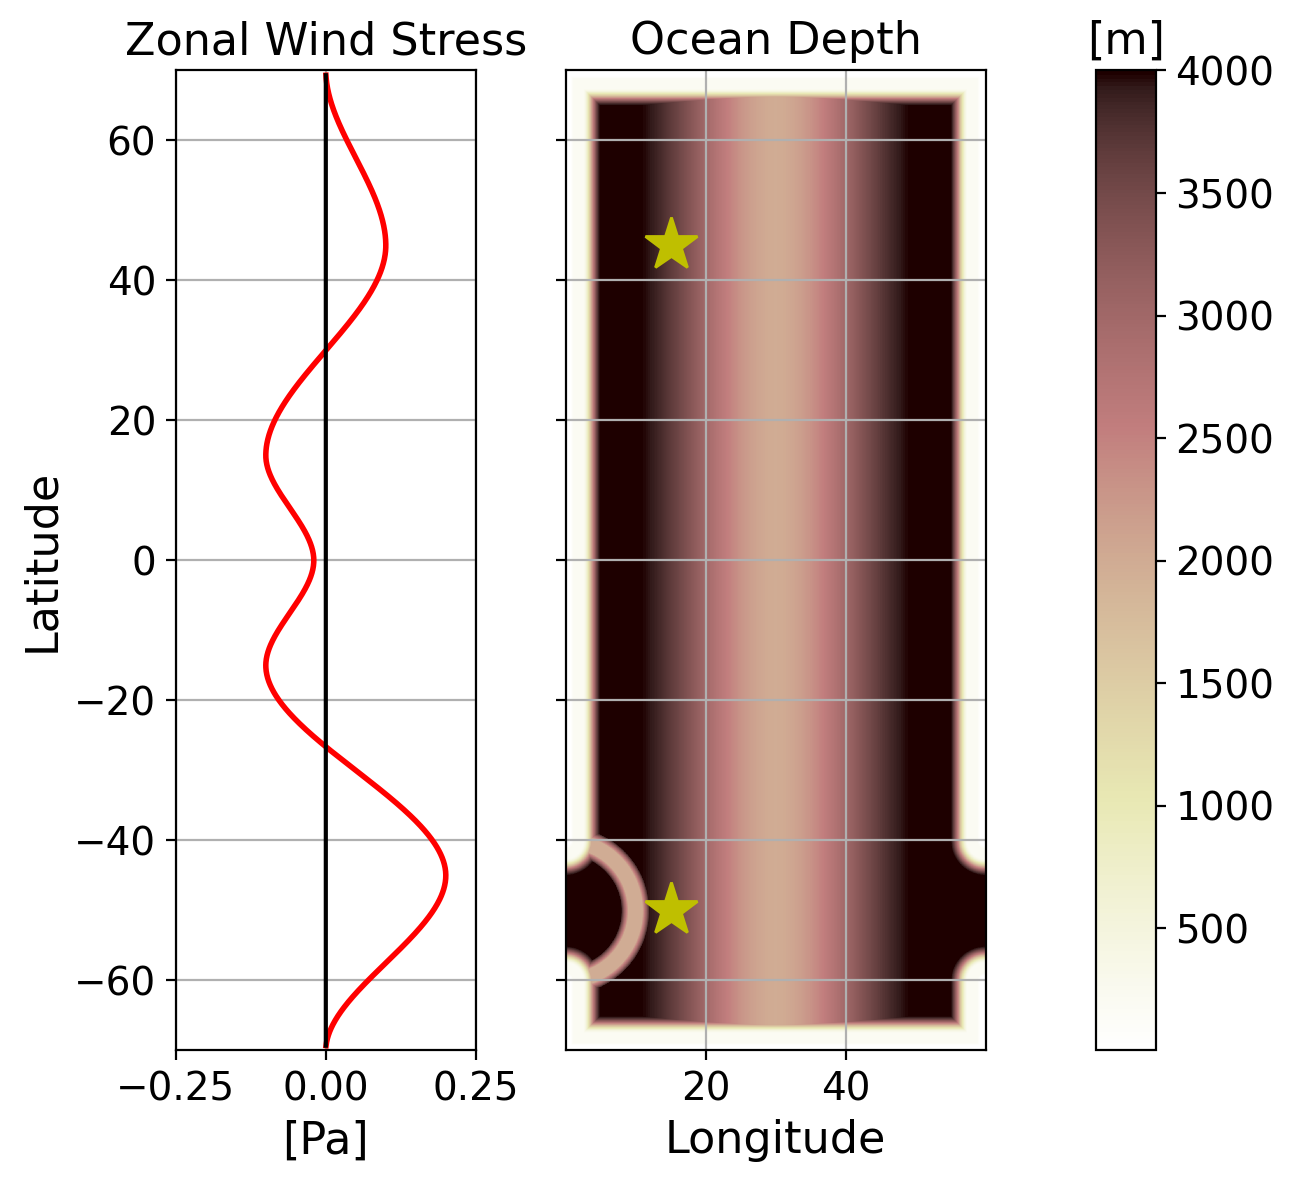

In [5]:
#Plotting zonal wind forcing (taux)
fig = plt.figure(figsize=(10, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.15,0.7]) #left, bottom, width, height
#ax2 = fig.add_axes([.46, 0.2, 0.03, 0.7])

ax3 = fig.add_axes([0.3,0.2,0.3,0.7])
ax4 = fig.add_axes([.61, 0.2, 0.03, 0.7])

ax1.set_title('Zonal Wind Stress',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.set_xlabel('[Pa]',fontsize=16)

ax1.tick_params(labelsize=14); 
ax1.set_xlim([-0.25,.25])
ax1.set_ylim([-70,70])
plotted =ax1.plot(taux[:,100],taux.yh,'r',linewidth=2)
plotted =ax1.plot(taux[:,100]*0,taux.yh,'k')



#
plotted =ax3.pcolor(xh,yh,depth,cmap='pink_r')
ax3.plot(taux.xh[120],taux.yh[920],'*',Markersize=20,color='y')
ax3.plot(taux.xh[120],taux.yh[160],'*',Markersize=20,color='y')
ax3.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax4, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
ax3.set_title('Ocean Depth',fontsize=16)
ax4.set_title('[m]',fontsize=16)
ax3.set_xlabel('Longitude',fontsize=16)
ax3.axes.yaxis.set_ticklabels([])

ax3.set_ylim([-70,70])
ax3.tick_params(labelsize=14); 
ax4.tick_params(labelsize=14)
ax1.grid('on')
ax3.grid('on')
plt.show()
#fig.savefig('taux.png')

## Plotting KE Snapshots

In [6]:
print(av)
grid= Grid(av, coords={'X': {'center': 'xh', 'outer': 'xq'}, #This tells the grid where xh, xq, yh, and yq are defined.
                        'Y': {'center': 'yh', 'outer': 'yq'}});


SSU = av.u[-1,0,:]; SSU=grid.interp(SSU,axis='X')
SSV = av.v[-1,0,:]; SSV=grid.interp(SSV,axis='Y')
print(SSU.shape,SSV.shape)

KE_surf =0.5*(SSU**2+SSV**2) 

<xarray.Dataset>
Dimensions:              (nv: 2, time: 20, xh: 1920, xq: 1921, yh: 4480, yq: 4481, zi: 16, zl: 15)
Coordinates:
  * xq                   (xq) float64 0.0 0.03125 0.0625 ... 59.94 59.97 60.0
  * yh                   (yh) float64 -69.98 -69.95 -69.92 ... 69.92 69.95 69.98
  * zl                   (zl) float64 1.023e+03 1.023e+03 ... 1.028e+03
  * time                 (time) float64 2.702e+03 2.708e+03 ... 2.798e+03
  * nv                   (nv) float64 1.0 2.0
  * xh                   (xh) float64 0.01562 0.04688 0.07812 ... 59.95 59.98
  * yq                   (yq) float64 -70.0 -69.97 -69.94 ... 69.94 69.97 70.0
  * zi                   (zi) float64 1.022e+03 1.023e+03 ... 1.028e+03
Data variables:
    h_du_dt              (time, zl, yh, xq) float32 ...
    h_dv_dt              (time, zl, yq, xh) float32 ...
    h_diffu              (time, zl, yh, xq) float32 ...
    h_diffv              (time, zl, yq, xh) float32 ...
    h_du_dt_visc         (time, zl, yh, xq) float32

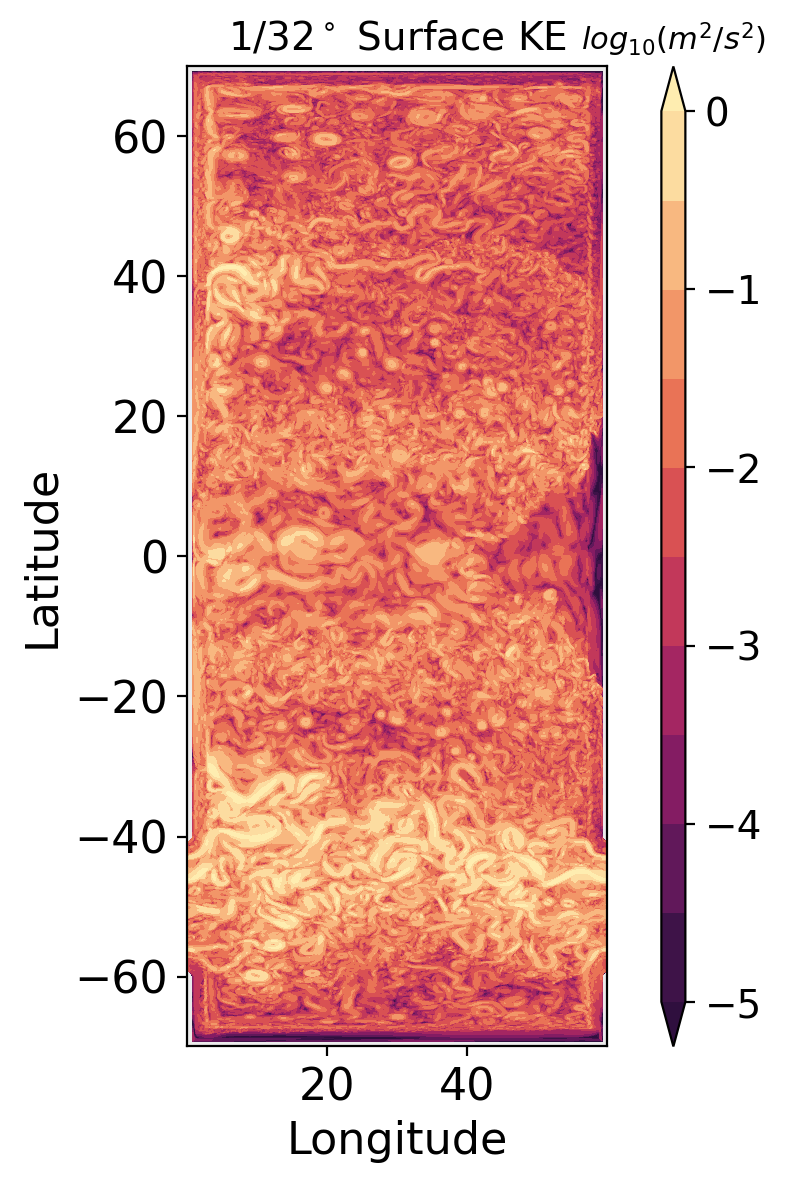

In [7]:
#Plotting KE 
fig = plt.figure(figsize=(4, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('1/32$^\circ$ Surface KE',fontsize=14)

ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)
ax2.set_title('$log_{10}(m^2/s^2)$',fontsize=11)

#KE_surface[(KE_surface)<1e-5]==1e-5
#levels=np.linspace(0.,.05,51) #not logarithmic colormap
levels=np.linspace(-5,0,11)
plotted =ax1.contourf(xh,yh,np.log10(KE_surf),levels=levels,cmap=cmocean.cm.matter_r,extend='both')

ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()

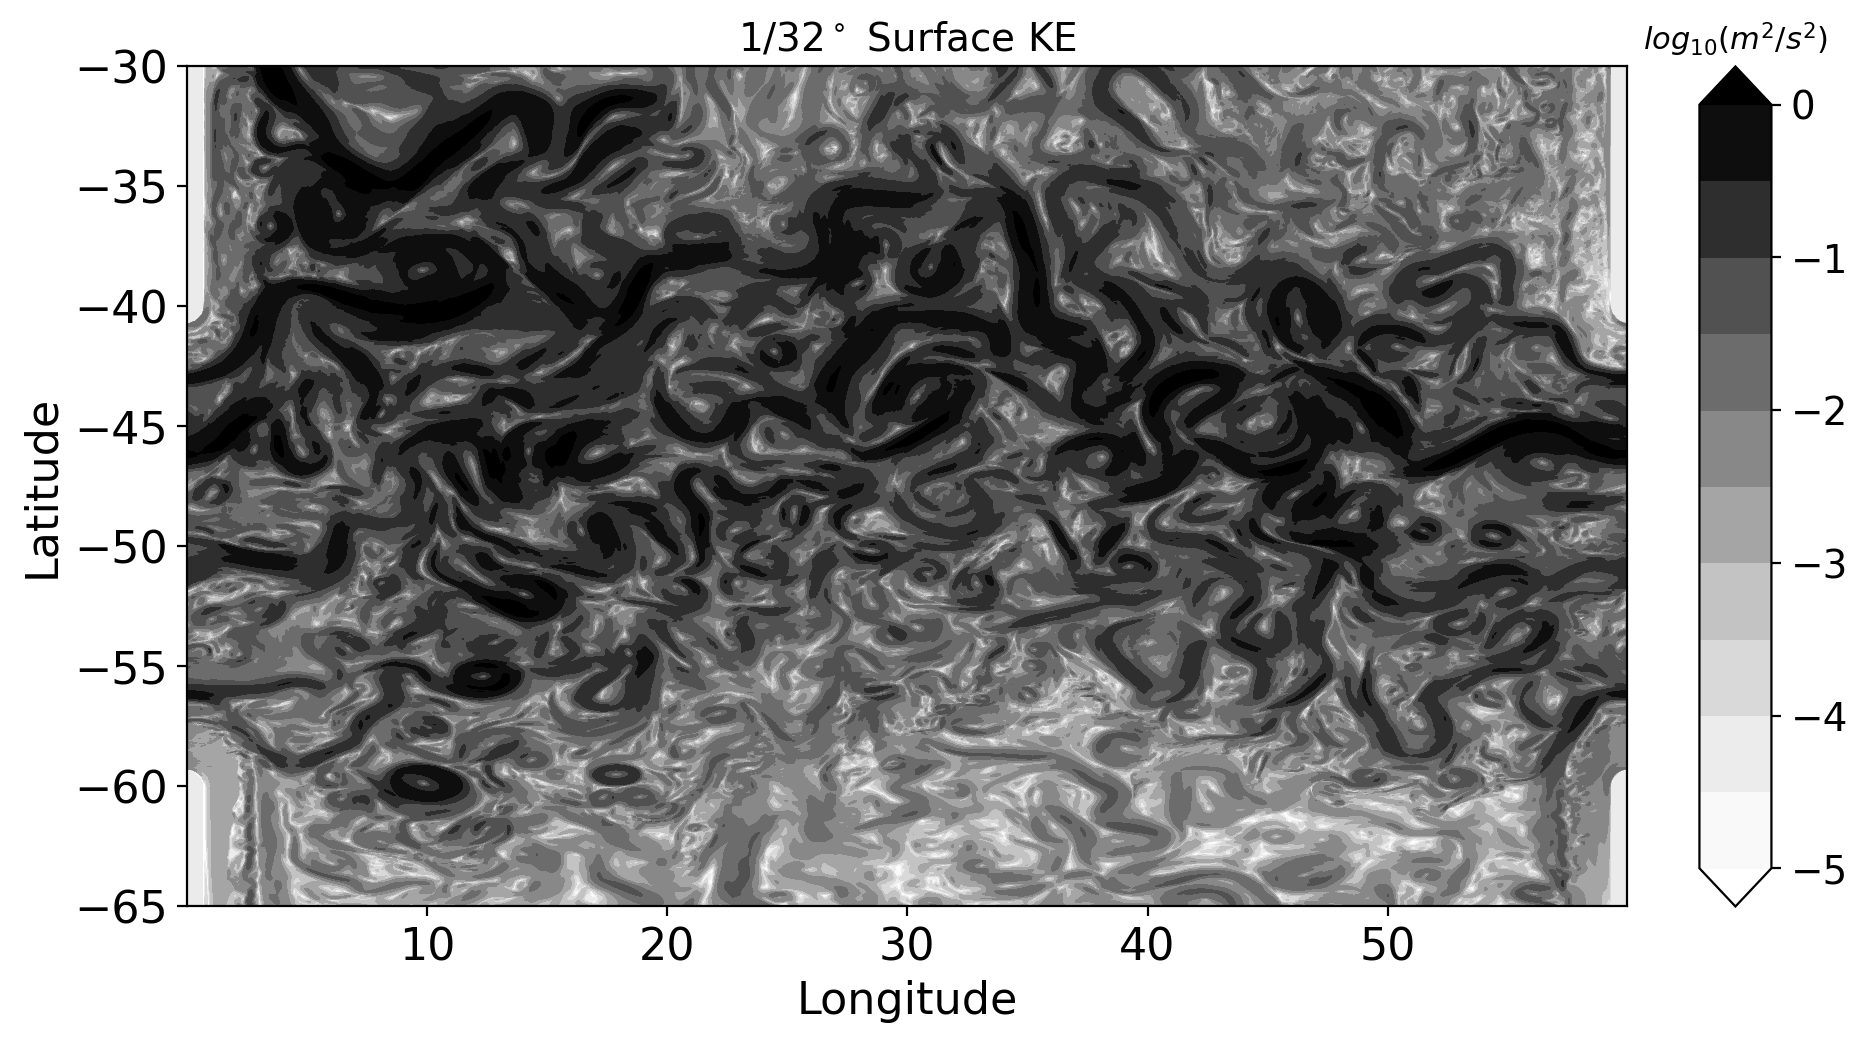

In [8]:
#Plotting KE 
fig = plt.figure(figsize=(12, 6), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
ax1.set_title('1/32$^\circ$ Surface KE',fontsize=14)

ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)
ax2.set_title('$log_{10}(m^2/s^2)$',fontsize=11)
ax1.set_ylim([-65,-30])

#KE_surface[(KE_surface)<1e-5]==1e-5
#levels=np.linspace(0.,.05,51) #not logarithmic colormap
levels=np.linspace(-5,0,11)
plotted =ax1.contourf(xh,yh,np.log10(KE_surf),levels=levels,cmap='Greys',extend='both')

#ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()

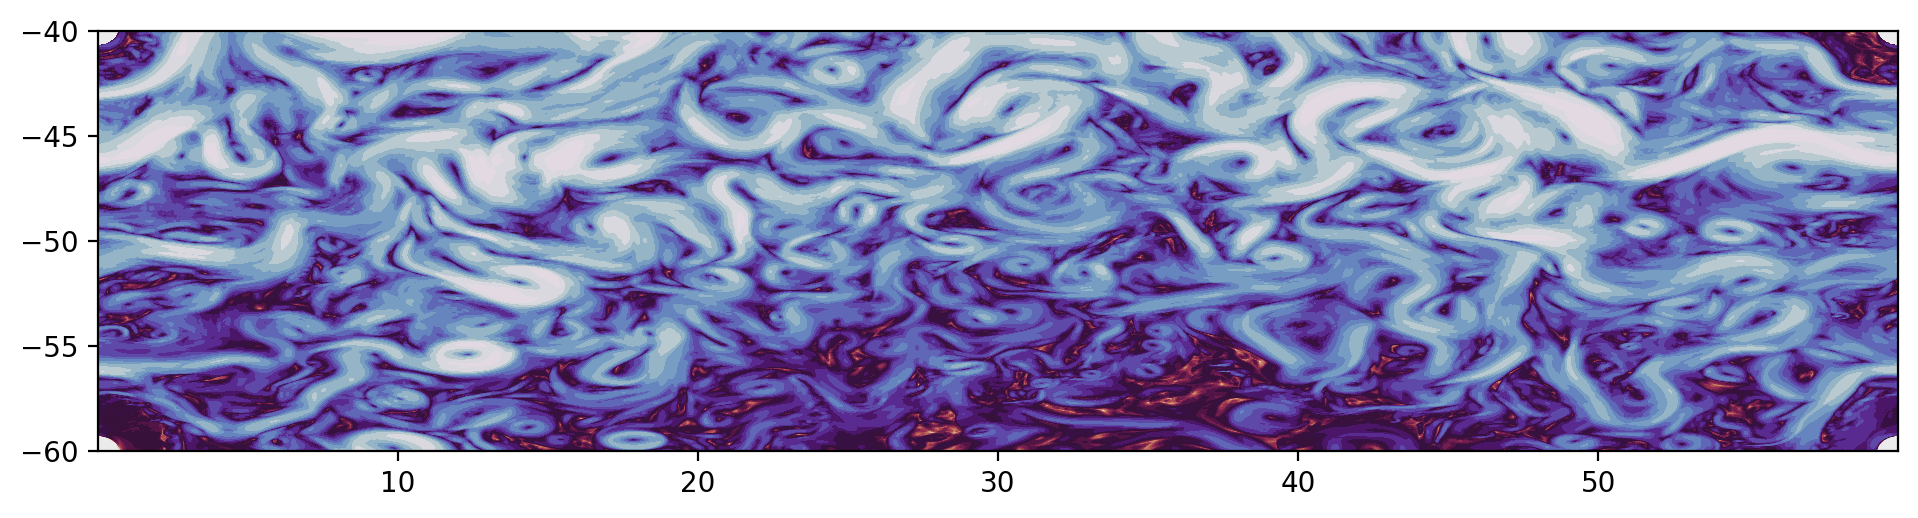

In [9]:
#Plotting KE 
fig = plt.figure(figsize=(15, 3), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
#ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
#ax1.set_title('1/32$^\circ$ Surface KE',fontsize=14)

#ax1.set_xlabel('Longitude',fontsize=16)
#ax1.set_ylabel('Latitude',fontsize=16)
#ax1.tick_params(labelsize=16); 
#ax2.tick_params(labelsize=14)
#ax2.set_title('$log_{10}(m^2/s^2)$',fontsize=11)
ax1.set_ylim([-60,-40])

#KE_surface[(KE_surface)<1e-5]==1e-5
#levels=np.linspace(0.,.05,51) #not logarithmic colormap
levels=np.linspace(-5,0,21)
plotted =ax1.contourf(xh,yh,np.log10(KE_surf),levels=levels,cmap='twilight_r',extend='both')

#ax1.set_aspect('equal', 'box')

#
plt.show()

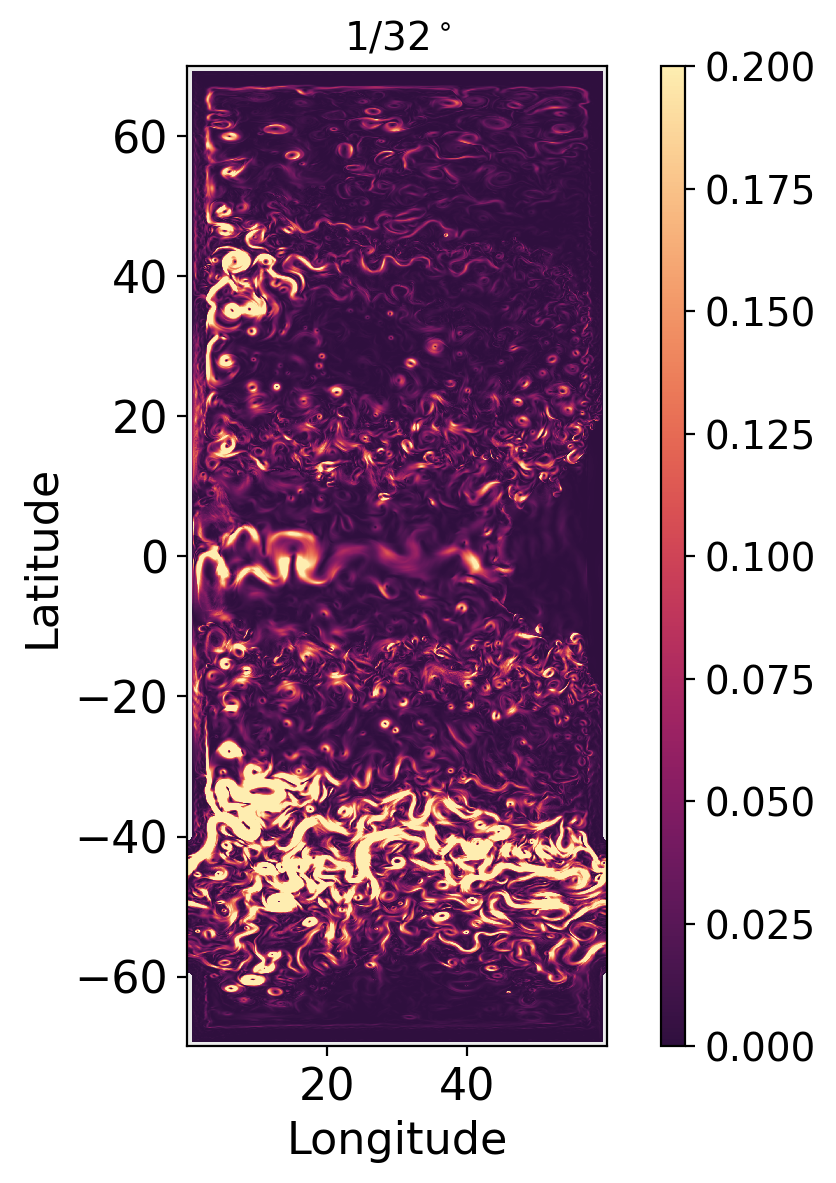

In [55]:
#Plotting KE 
fig = plt.figure(figsize=(4, 7), dpi=200, facecolor='w', edgecolor='k')
ax1 = fig.add_axes([0.15,0.2,0.6,0.7]) 
ax2 = fig.add_axes([.78, 0.2, 0.03, 0.7])
ax1.set_facecolor((0.92, 0.92, 0.92))
#ax1.set_title('Surface KE (1/32$^\circ$)',fontsize=14)
ax1.set_title('1/32$^\circ$',fontsize=14)

ax1.set_xlabel('Longitude',fontsize=16)
ax1.set_ylabel('Latitude',fontsize=16)
ax1.tick_params(labelsize=16); 
ax2.tick_params(labelsize=14)
#ax2.set_title('$log_{10}(m^2/s^2)$',fontsize=10)

#KE_surface[(KE_surface)<1e-5]==1e-5
#levels=np.linspace(0.,.05,51) #not logarithmic colormap
#levels=np.linspace(-5,0,11)
plotted =ax1.pcolor(xh,yh,(KE_surface),cmap=cmocean.cm.matter_r,vmin=0,vmax=0.2)

ax1.set_aspect('equal', 'box')
cbar = plt.colorbar(mappable=plotted, cax=ax2, orientation = 'vertical');
cbar.ax.tick_params(labelsize=14);
#
plt.show()

In [7]:
weighted_KE_mean=np.tile((np.nansum(h*KE,axis=0)/np.nansum(h,axis=0)),[100,1,1])
weighted_KE_mean.shape

(100, 560, 240)